In [1]:
from flygym import SingleFlySimulation, Fly, Camera
import matplotlib.pyplot as plt
import numpy as np
from utils.arenas import Corridor, CorridorWithPillars
from utils.turning_controller import TurningController
from flygym.vision import Retina
plt.style.use("default")

retina = Retina()

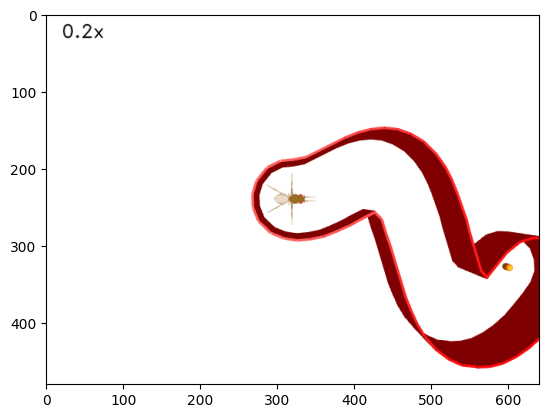

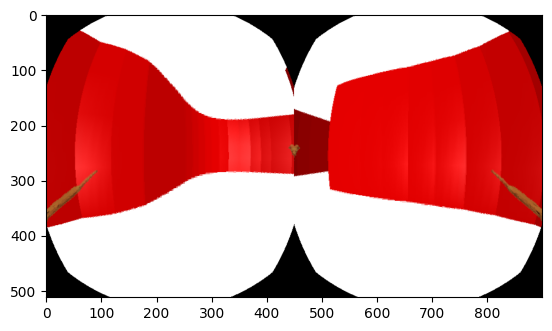

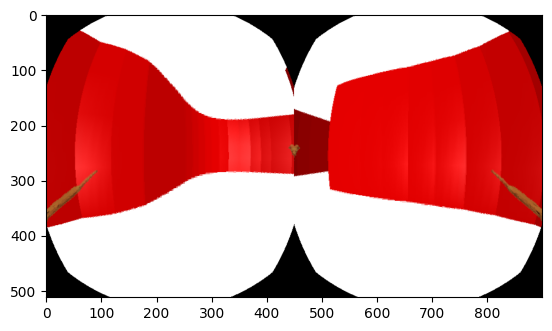

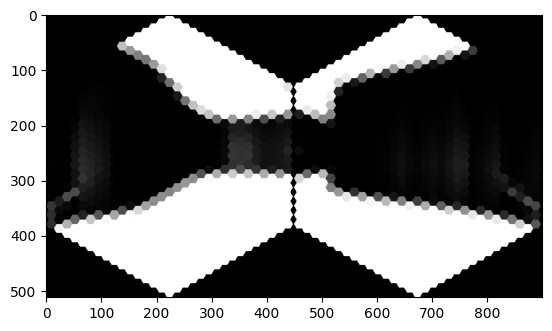

In [5]:
fly = Fly(render_raw_vision=True, enable_vision=True)
arena = Corridor(seed=10, h=3)
cam = Camera(
    attachment_point=fly.model.worldbody,
    camera_name="camera_top_zoomout",
)
sim = TurningController(
    fly=fly,
    arena=arena,
    cameras=[cam],
)
obs, info = sim.reset(seed=0)

# for _ in range(10000):
#     sim.step(np.array([0, 1.0]))

fig, ax = plt.subplots()
ax.imshow(sim.render()[0])
fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)

fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)

fig, ax = plt.subplots()
ax.imshow(np.concatenate([retina.hex_pxls_to_human_readable(i, color_8bit=False).max(-1) for i in obs["vision"]], axis=1), cmap="gray")

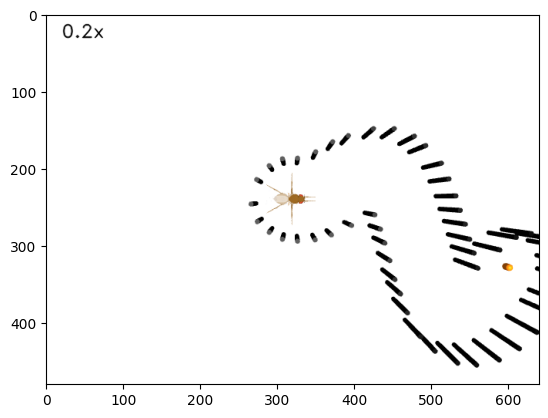

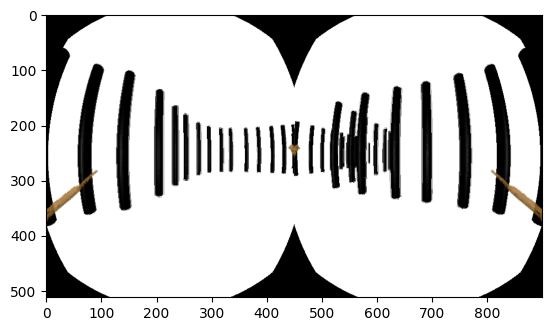

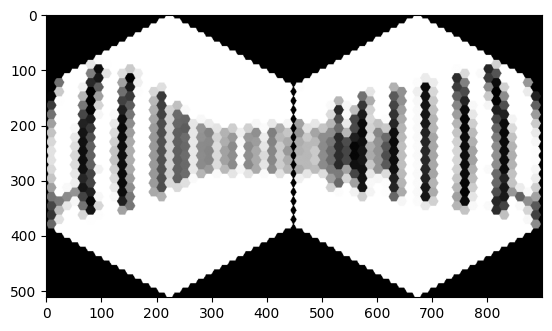

In [6]:
fly = Fly(render_raw_vision=True, enable_vision=True)
arena = CorridorWithPillars(thick=0.5, seed=10, h=5)
cam = Camera(
    attachment_point=fly.model.worldbody,
    camera_name="camera_top_zoomout",
)
sim = SingleFlySimulation(
    fly=fly,
    arena=arena,
    cameras=[cam],
)
obs, info = sim.reset(seed=0)
fig, ax = plt.subplots()
ax.imshow(sim.render()[0])
fig, ax = plt.subplots()
ax.imshow(np.concatenate(info["raw_vision"], axis=1) / 255)
fig, ax = plt.subplots()
ax.imshow(np.concatenate([retina.hex_pxls_to_human_readable(i, color_8bit=False).max(-1) for i in obs["vision"]], axis=1), cmap="gray")